# Morpion Solitaire package documentation

This notebook contains some examples on how to use the library MorpionSolitaire.py, including running a random exploration as well as importing/exporting files

First thing: import the library:

In [1]:
from MorpionSolitaire import *

## Class `Grid`

The first important class is called `Grid`

In [2]:
grid = Grid()

A grid is an array of 22x22 cells, each consisting in
- a point
- an horizontal line
- a vertical line
- two diagonal lines

In [3]:
grid.cell.shape

(22, 22, 5)

The method `print()` displays the grid using `matplotlib`

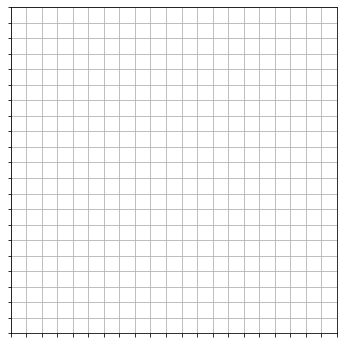

In [4]:
grid.print()

By default the constructor defines an empty grid.
But there are also some pre-defined grids that will be the starting configurations for the game

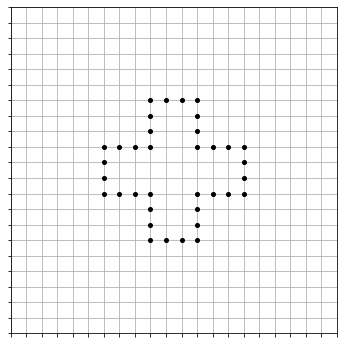

In [5]:
grid = Grid('cross')
grid.print()

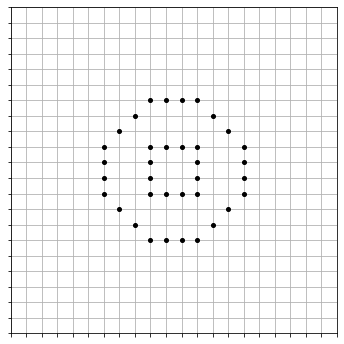

In [6]:
grid = Grid('pipe')
grid.print()

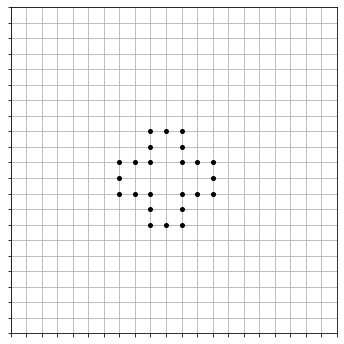

In [7]:
grid = Grid('cross4')
grid.print()

Note that `print()` takes various optional arguments 

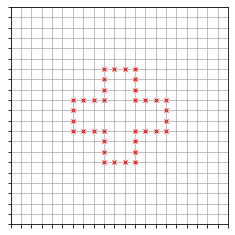

In [8]:
grid = Grid('cross')
grid.print(color='r',marker='x',size=4)

'Segments' can be added to a grid:

A segment is a 4-tuple `(x, y, dir, n)` where:
- `x, y` are the coordinates of the point to be added
- `dir` is the direction (see below)
- `n` indicates the position of the point on the line

In [9]:
grid.DIRECTIONS[1:5]

((1, 0), (0, 1), (1, 1), (-1, 1))

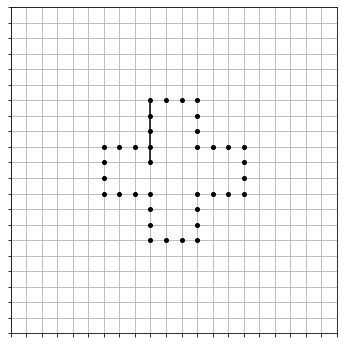

In [10]:
grid.add_segment((9, 11, 2, 0))
grid.print()

One can also ask if a move is legal:

In [11]:
grid.is_legal((13, 8, 3, 2))

True

Obviously once a move has been made it is not legal to repeat it:

In [12]:
grid.add_segment((13, 8, 3, 2))
grid.is_legal((13, 8, 3, 2))

False

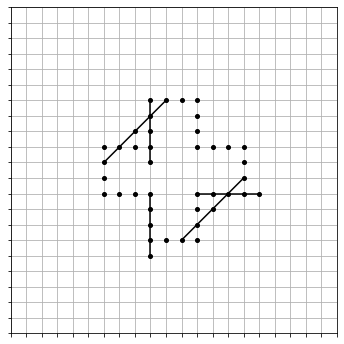

In [13]:
grid.add_segment((16, 9, 1, 4))
grid.add_segment((8, 13, 3, 2))
grid.add_segment((9, 5, 2, 0))
grid.print()

There is also a method to remove a segment:

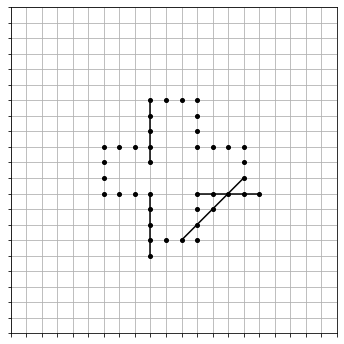

In [14]:
grid.remove_segment((8, 13, 3, 2))
grid.print()

The list of all legal moves for a given grid can be computed with `computelegalmoves`

In [15]:
len(grid.compute_legal_moves())

23

In [16]:
len(Grid('cross').compute_legal_moves())

28

In [17]:
len(Grid('pipe').compute_legal_moves())

24

## Classes `Game`, `StartingGame`, and `PlayingGame`

A `Game` is a class whose attributes are:
- a set of rules, in particular the segment length `seglen'
- a Grid `grid`
- a list of allowed moves `moves'
- a `score`

In addition it has several methods such as:
- `print()` showing the current grid together with the score and number of legal moves
- `play(fct)` that let the game evolve either until there are no more legal moves, or until a given `depth` is reached. At each turn it picks a legal move according to a function `fct`.

The class `Game` is formally an abstract class (although Python does not have abstract classes): it should not be used directly, but one should instead use of of its two child classes `StartingGame` or `PlayingGame`.

`StartingGame` can be initialized without arguments, or specifying a set of rules.
Instead, `PlayingGame` can only be initialized from an existing instance of `Game`

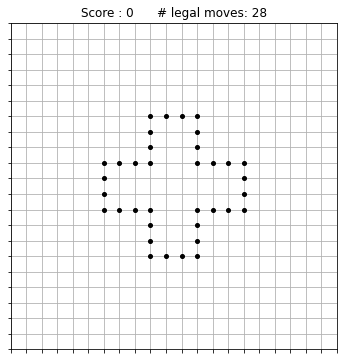

In [18]:
game = StartingGame()
game.print()

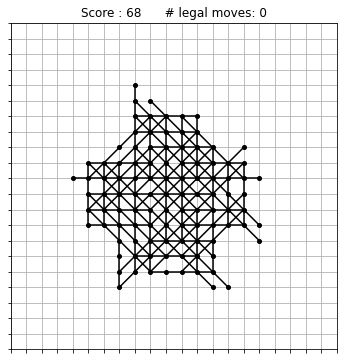

In [19]:
endgame = game.play(index = 0)
endgame.print()

One can also let the game evolve until a certain score specified by the argument `depth`:

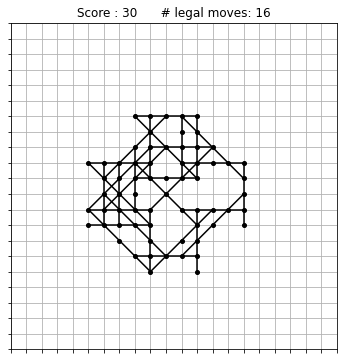

In [20]:
middlegame = game.play(index = 0, depth = 30)
middlegame.print()

Alternatively, intermediate configurations can be accessed from the end game with the method `get_parent(depth)`:

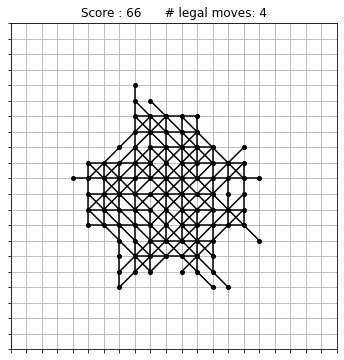

In [21]:
endgame.get_parent(2).print()

Legal moves can be printed with the optional argument `show_legal_moves`:

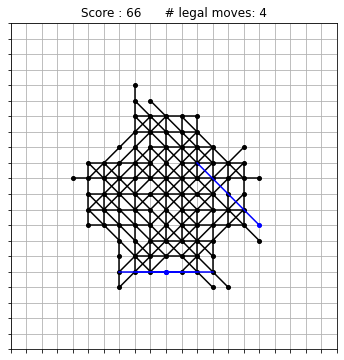

In [22]:
endgame.get_parent(2).print(show_legal_moves = True)

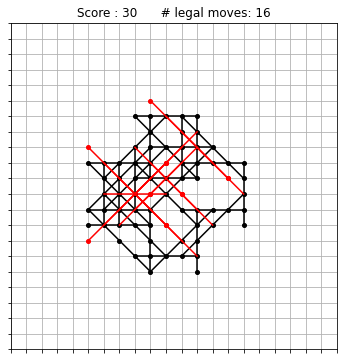

In [23]:
middlegame.print(show_legal_moves = True, legal_moves_color = 'r')

One can use widgets for an interactive display of the game:

In [24]:
import ipywidgets as widgets

def printgame(step, moves):
    return endgame.get_parent(endgame.score - step).print(show_legal_moves = moves)

widgets.interact(printgame,
                 step = widgets.IntSlider(min=0, max=endgame.score, step=1, value=endgame.score,
                                          continuous_update=False),
                 moves = False);

interactive(children=(IntSlider(value=68, continuous_update=False, description='step', max=68), Checkbox(value…

Different playing methods give different results.
The `index` passed to the method `play` decides which move is chosen from a list of all legal moves.

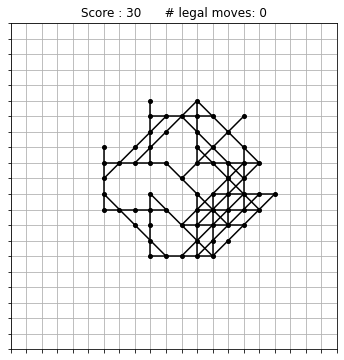

In [25]:
endgame = game.play(index = -1)
endgame.print()

By default, the `play` picks a move at random:

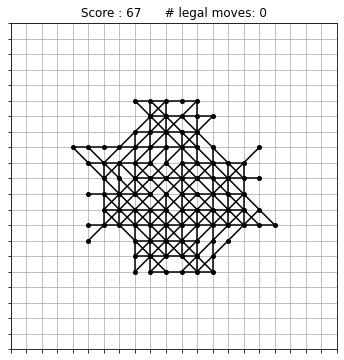

In [26]:
randomgame = game.play()
randomgame.print()

One can also play using a model that gives a given weight to each of the legal move. The model takes as input an array of `Grid` corresponding to each move, and must return an array of numbers. Typically this weight is an estimate of the number of subsequent moves.

Let us consider a toy model that returns weights at random:

In [27]:
def model(grids):
    return np.random.randint(100, size = len(grids))

The method `compute_weights` determines the weights of all legal moves:

In [28]:
game.compute_weights(model)

array([81,  0,  8, 97, 83, 30, 74,  4, 11, 15, 21, 84, 43, 76, 40, 38,  7,
       31, 79, 76, 34, 88, 58, 73, 65, 82, 93, 29])

When the game is played according to this `model`, then at each step the move with the highest weight is chosen (in this example this is still random).

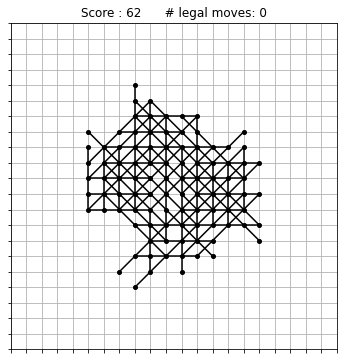

In [36]:
randomgame = game.play(model = model)
randomgame.print()

Alternatively, it is possible to chose the move at random according to the probability distribution `exp(weight/t)`, where `t` is an optional argument of `play`:

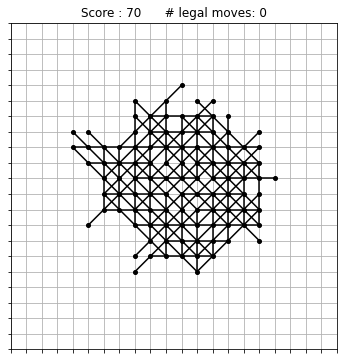

In [37]:
randomgame = game.play(model = model, t = 10.0)
randomgame.print()

Different game starting with a pipe pattern:

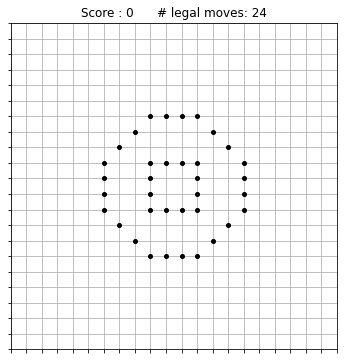

In [31]:
gamepipe = StartingGame('pipe')
gamepipe.print()

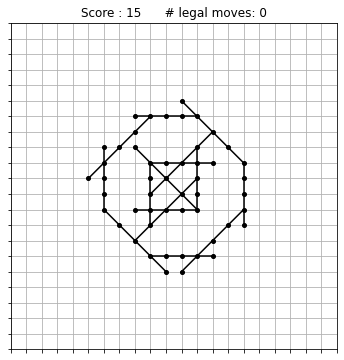

In [32]:
gamepipe.play().print()

Different rules are possible: for instance with shorter segments (3 instead of 4)

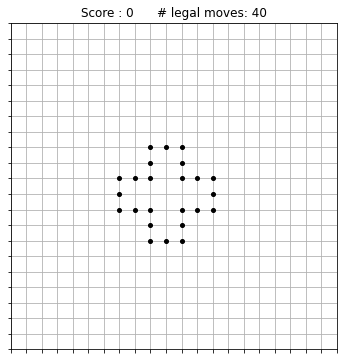

In [33]:
gamecross4 = StartingGame('cross4', seg_len = 3)
gamecross4.print()

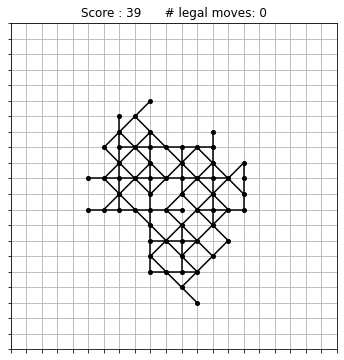

In [34]:
gamecross4.play().print()

Or one can require spacing between consecutive lines:

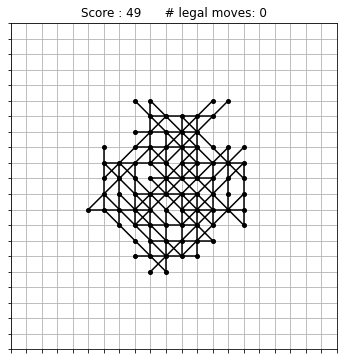

In [35]:
gamecrossD = StartingGame('cross', touching_rule = False)
gamecrossD.play().print()